In [3]:
import pandas as pd 

from sklearn.datasets import load_iris
iris=load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [4]:
iris.data
iris.feature_names
iris.target
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df =pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df["flower"]=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


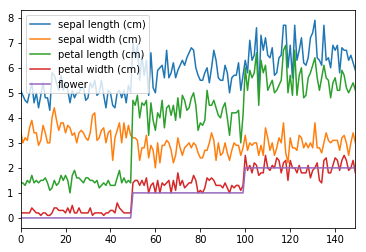

In [7]:
import matplotlib.pyplot as plt
df.plot()

In [8]:
x=df.drop("flower",axis=1)
y=df.flower

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=10)

In [10]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=50)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
ym=clf.predict(x_test)

In [12]:
clf.score(x_train,y_train)

1.0

In [13]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,ym)
cm

array([[18,  0,  0],
       [ 0, 22,  2],
       [ 0,  0, 18]], dtype=int64)

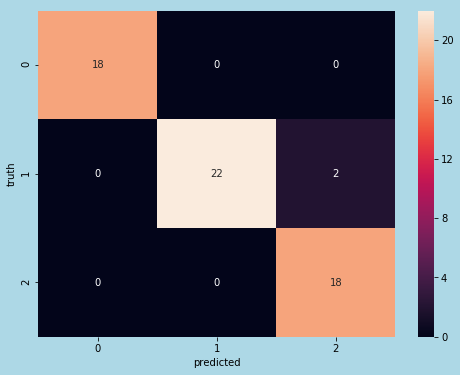

In [14]:
import matplotlib.pyplot as plt 
import seaborn as sn
plt.figure(facecolor='lightblue',figsize=(8,6))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.show()